# Building a pokemon classification model using tensorflow

## Import libraries

In [1]:
import os
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt

## Import dataset




#### List all the image filenames present in "../input/pokemon-images-and-types/images/images" location and show first five images using matplotib subplots


This is the list of all the files present in the path given to us:

['throh.png', 'samurott.png', 'venomoth.png', 'latios.png', 'shinx.png', 'durant.png', 'geodude.png', 'wingull.png', 'miltank.png', 'castform.png', 'squirtle.png', 'shaymin-land.png', 'raikou.png', 'mawile.png', 'gallade.png', 'type-null.jpg', 'patrat.png', 'froslass.png', 'lurantis.jpg', 'nidoking.png', 'magnemite.png', 'cloyster.png', 'spinarak.png', 'meloetta-aria.png', 'melmetal.jpg', 'exploud.png', 'vanillish.png', 'scrafty.png', 'azelf.png', 'mew.png', 'dialga.png', 'cryogonal.png', 'venonat.png', 'scatterbug.png', 'regigigas.png', 'ferroseed.png', 'butterfree.png', 'komala.jpg', 'porygon.png', 'cosmoem.jpg', 'tepig.png', 'dragonite.png', 'solgaleo.jpg', 'paras.png', 'scolipede.png', 'smeargle.png', 'pichu.png', 'tropius.png', 'typhlosion.png', 'masquerain.png', 'kecleon.png', 'breloom.png', 'inkay.png', 'krabby.png', 'pyukumuku.jpg', 'minior-meteor.jpg', 'swalot.png', 'liepard.png', 'cherrim.png', 'taillow.png',

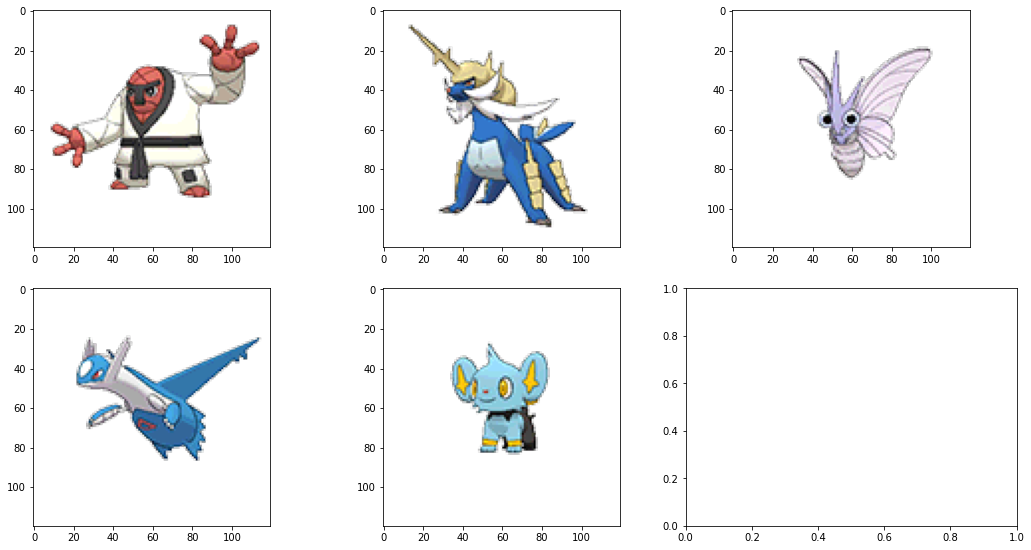

In [2]:
# defining root directory
from PIL import Image

root_dir = "../input/pokemon-images-and-types/images/images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)
print("This is the list of all the files present in the path given to us:\n")
print(File_names)

# plot here
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

def subplots():
# Use the axes for plotting
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);
    
subplots()

In [3]:
data = pd.read_csv("../input/pokemon-images-and-types/pokemon.csv")
data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


## We are going to use Type1 column as our labels. Each Name is unique and classified into 18 Type1 types. 

In [4]:
## Run the below cells as it is
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)

{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [5]:
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


#### Create a dictionary and assign each label in labels list a unique id from 1 to 18. Name the dictionary as "labels_idx"

In [6]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [7]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 
    label = labels_idx[data_dict[file.split(".")[0]]] 
    # append img in final_images list
    final_images.append(np.array(img))
    # append label in final_labels list
    final_labels.append(np.array(label))
    
    
# converting lists into numpy arrayn
# normalizing and reshaping the data 
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

### We have segregated our data into images and labels and is the time to build our model using tensorflow

In [8]:
# import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])
# print model summary and check trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 43200)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               4320100   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 18)                1818      
Total params: 4,342,118
Trainable params: 4,342,118
Non-trainable params: 0
_________________________________________________________________


2022-05-07 12:29:06.349210: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
# compile model (Use: Adam optimizer, categorical_crossentropy loss and metrics as Accuracy)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fit model (use images and labels)
history = model.fit(final_images, final_labels, epochs=50)

2022-05-07 12:29:06.823239: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
26/26 [==============================] - 1s 23ms/step - loss: 4.0056 - accuracy: 0.1236
Epoch 2/50
26/26 [==============================] - 1s 23ms/step - loss: 2.8434 - accuracy: 0.1817
Epoch 3/50
26/26 [==============================] - 1s 26ms/step - loss: 2.6132 - accuracy: 0.1978
Epoch 4/50
26/26 [==============================] - 1s 23ms/step - loss: 2.4027 - accuracy: 0.2509
Epoch 5/50
26/26 [==============================] - 1s 23ms/step - loss: 2.2099 - accuracy: 0.3090
Epoch 6/50
26/26 [==============================] - 1s 23ms/step - loss: 1.9632 - accuracy: 0.3918
Epoch 7/50
26/26 [==============================] - 1s 23ms/step - loss: 1.7452 - accuracy: 0.4771
Epoch 8/50
26/26 [==============================] - 1s 23ms/step - loss: 1.6038 - accuracy: 0.5006
Epoch 9/50
26/26 [==============================] - 1s 25ms/step - loss: 1.3814 - accuracy: 0.5822
Epoch 10/50
26/26 [==============================] - 1s 23ms/step - loss: 1.1508 - accuracy: 0.6675
Epoch 11/

In [10]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)

print("\n",predictions[0])
id = np.argmax(predictions[0])
print("\nid that we got from the model as prediction: {}\nType of pokemon associted with that id: {} ".format(id,labels[id]))
print("accuracy of the model",history.history['accuracy'][-1])


 [6.7500623e-12 3.1934518e-12 1.3613334e-11 4.1047352e-17 7.5881738e-11
 1.1776337e-13 4.4363540e-14 4.7816291e-12 1.4420803e-07 9.9999857e-01
 7.7599548e-13 2.4093286e-10 4.7193278e-12 1.2250590e-06 9.7921974e-12
 2.2823855e-10 2.8125191e-12 1.2473085e-07]

id that we got from the model as prediction: 9
Type of pokemon associted with that id: Fighting 
accuracy of the model 0.9060568809509277
